In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
star_wars = pd.read_csv("/kaggle/input/star-wars/StarWars.csv", encoding="ISO-8859-1")

In [6]:
star_wars.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [7]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [9]:
yes_no = {
    "Yes":True,
    "No":False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Expanded Universe?æ'] = star_wars['Do you consider yourself to be a fan of the Expanded Universe?æ'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no)
star_wars['Are you familiar with the Expanded Universe?'] = star_wars['Are you familiar with the Expanded Universe?'].map(yes_no)

In [10]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

In [12]:
# First rename the columns for clarity
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

# Convert the ranking columns to numeric, forcing non-numeric values to NaN
for col in star_wars.columns[9:15]:
    star_wars[col] = pd.to_numeric(star_wars[col], errors='coerce')

# Now the columns should be properly converted to float type
print(star_wars[star_wars.columns[9:15]].dtypes)

ranking_1    float64
ranking_2    float64
ranking_3    float64
ranking_4    float64
ranking_5    float64
ranking_6    float64
dtype: object


<Axes: >

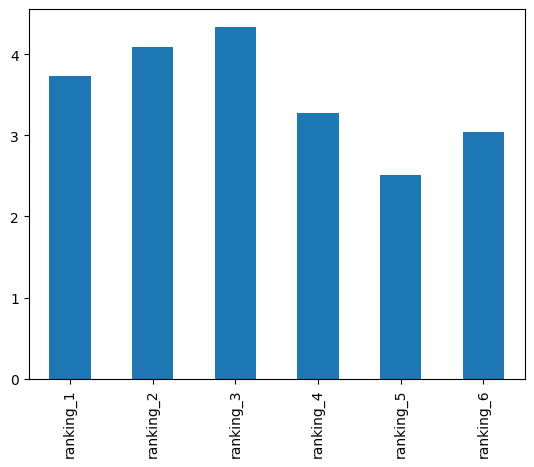

In [15]:
ranking_means = star_wars[star_wars.columns[9:15]].mean()
ranking_means.plot.bar()

<Axes: >

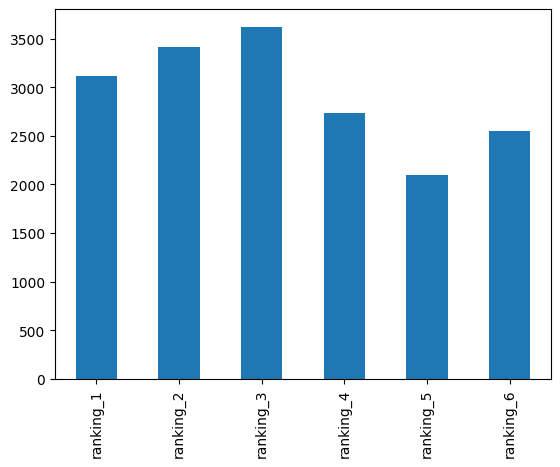

In [17]:
seen_count = star_wars[star_wars.columns[9:15]].sum()
seen_count.plot.bar()

In [18]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Compare rankings between genders
male_rankings = males[males.columns[9:15]].mean()
female_rankings = females[females.columns[9:15]].mean()

# Compare views between genders
male_views = males[males.columns[3:9]].sum()
female_views = females[females.columns[3:9]].sum()

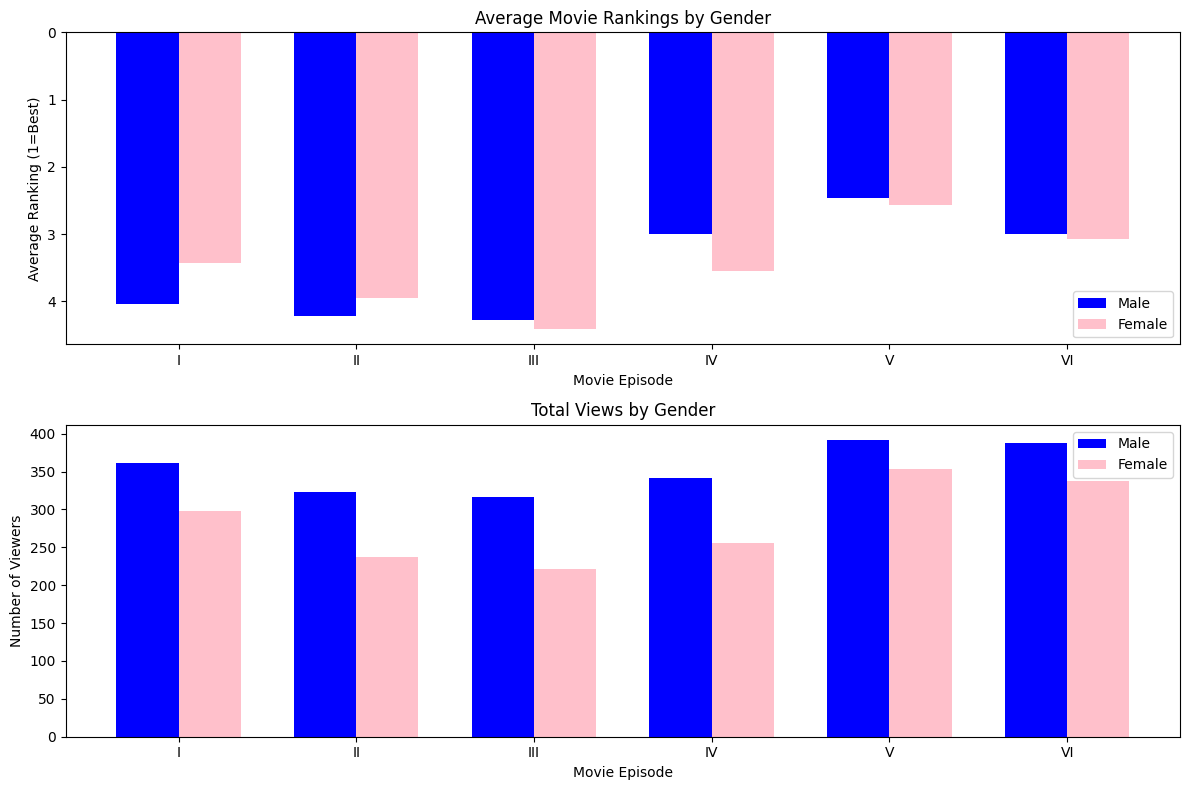

In [19]:
import matplotlib.pyplot as plt

# Split by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Set up the figure
plt.figure(figsize=(12, 8))

# Rankings by gender
plt.subplot(2, 1, 1)
male_rankings = males[males.columns[9:15]].mean()
female_rankings = females[females.columns[9:15]].mean()

index = range(6)
bar_width = 0.35
plt.bar(index, male_rankings, bar_width, color='blue', label='Male')
plt.bar([i + bar_width for i in index], female_rankings, bar_width, color='pink', label='Female')
plt.title('Average Movie Rankings by Gender')
plt.xlabel('Movie Episode')
plt.ylabel('Average Ranking (1=Best)')
plt.xticks([i + bar_width/2 for i in index], ['I', 'II', 'III', 'IV', 'V', 'VI'])
plt.legend()
plt.gca().invert_yaxis()  # Lower rankings = better

# Views by gender
plt.subplot(2, 1, 2)
male_views = males[males.columns[3:9]].sum()
female_views = females[females.columns[3:9]].sum()

plt.bar(index, male_views, bar_width, color='blue', label='Male')
plt.bar([i + bar_width for i in index], female_views, bar_width, color='pink', label='Female')
plt.title('Total Views by Gender')
plt.xlabel('Movie Episode')
plt.ylabel('Number of Viewers')
plt.xticks([i + bar_width/2 for i in index], ['I', 'II', 'III', 'IV', 'V', 'VI'])
plt.legend()

plt.tight_layout()
plt.show()

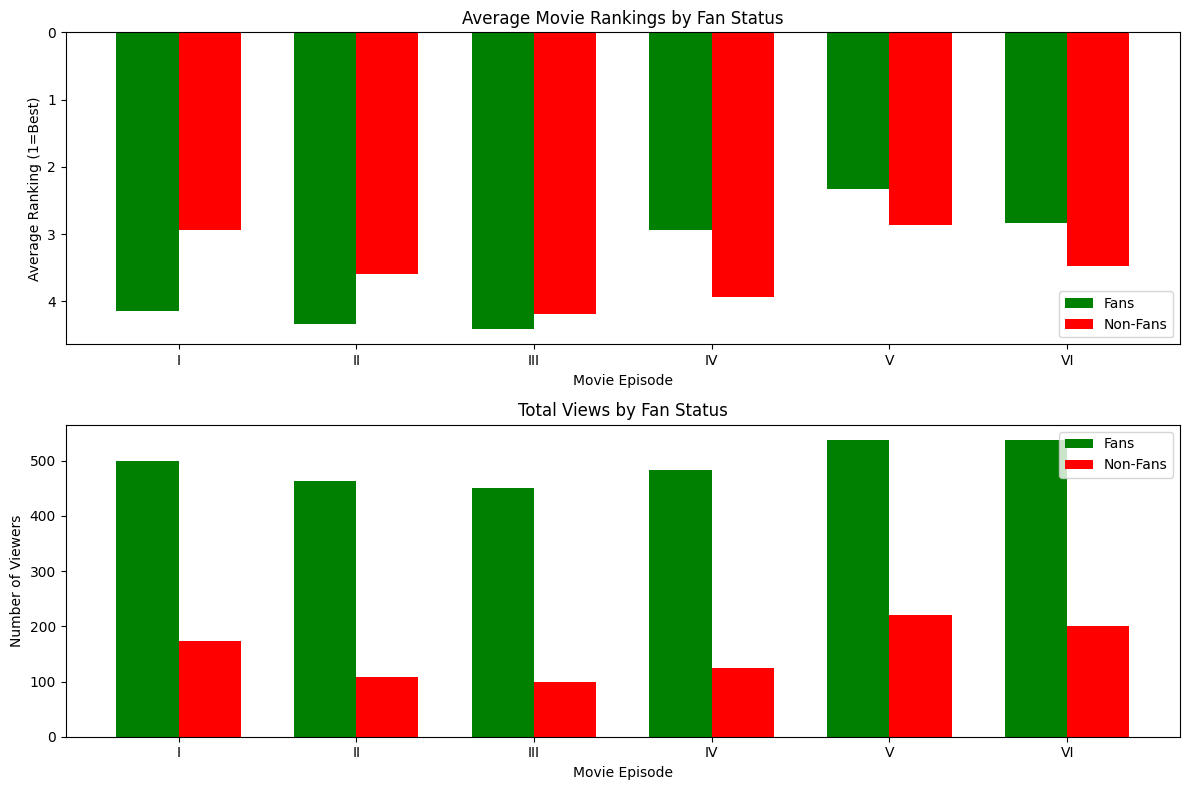

In [20]:
# Split by fan status
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

# Set up the figure
plt.figure(figsize=(12, 8))

# Rankings comparison
plt.subplot(2, 1, 1)
fan_rankings = fans[fans.columns[9:15]].mean()
nonfan_rankings = non_fans[non_fans.columns[9:15]].mean()

plt.bar(index, fan_rankings, bar_width, color='green', label='Fans')
plt.bar([i + bar_width for i in index], nonfan_rankings, bar_width, color='red', label='Non-Fans')
plt.title('Average Movie Rankings by Fan Status')
plt.xlabel('Movie Episode')
plt.ylabel('Average Ranking (1=Best)')
plt.xticks([i + bar_width/2 for i in index], ['I', 'II', 'III', 'IV', 'V', 'VI'])
plt.legend()
plt.gca().invert_yaxis()

# Views comparison
plt.subplot(2, 1, 2)
fan_views = fans[fans.columns[3:9]].sum()
nonfan_views = non_fans[non_fans.columns[3:9]].sum()

plt.bar(index, fan_views, bar_width, color='green', label='Fans')
plt.bar([i + bar_width for i in index], nonfan_views, bar_width, color='red', label='Non-Fans')
plt.title('Total Views by Fan Status')
plt.xlabel('Movie Episode')
plt.ylabel('Number of Viewers')
plt.xticks([i + bar_width/2 for i in index], ['I', 'II', 'III', 'IV', 'V', 'VI'])
plt.legend()

plt.tight_layout()
plt.show()